In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/output/preprocessed.csv')

In [7]:
from src.factors.factors import mutated_amino_acids
df = mutated_amino_acids(df)

In [8]:
from typing import Any

import lightning.pytorch as pl
import numpy as np
import pandas as pd
import torch
import yaml
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.loggers import CometLogger
from torch.utils.data import DataLoader

from src.data.df_dataset import DfDataset
from src.data.grouped_batch_sampler import GroupedBatchSampler
from src.data.splitting import create_data_splits
from src.modeling import loss_factory, model_factory, optimizer_factory
from src.utils.misc import set_seed

In [16]:
set_seed()

torch.set_default_dtype(torch.float32)

splitting_config ={
    "train_fraction": 0.6,
    "test_fraction": 0.2,
    "group_variable": "mutated_amino_acids"
}
dataset_config = {
    "variables": [ 
        "rna_loops",
        "mutated_amino_acids"
    ],
    "target_variable": "fitness"
}
dataloader_config = {
    "batch_size": 256,
    "group_key": "mutated_amino_acids"
}

train_df, test_df, val_df = create_data_splits(df, **splitting_config)

train_dataset = DfDataset(train_df, **dataset_config)
test_dataset = DfDataset(test_df, **dataset_config)
val_dataset = DfDataset(val_df, **dataset_config)


In [17]:
train_loader = DataLoader(
    train_dataset,
    batch_sampler=GroupedBatchSampler(train_dataset, **dataloader_config),
)

In [34]:
next(iter(train_loader))[1]

tensor([-0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005, -0.5005,
        -0.5005, -0.5005, -0.5005, -0.50

In [35]:
wf = pd.read_csv("../data/output/with_factors.csv")

In [36]:
wf.columns

Index(['Unnamed: 0', 'sequence_dna', 'fitness', 'p_value', 'standard_error',
       'mutated_wildtype_dna', 'rna_loops', 'mutated_amino_acids',
       'prediction'],
      dtype='object')

In [41]:
import seaborn as sns

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prediction', ylabel='fitness'>

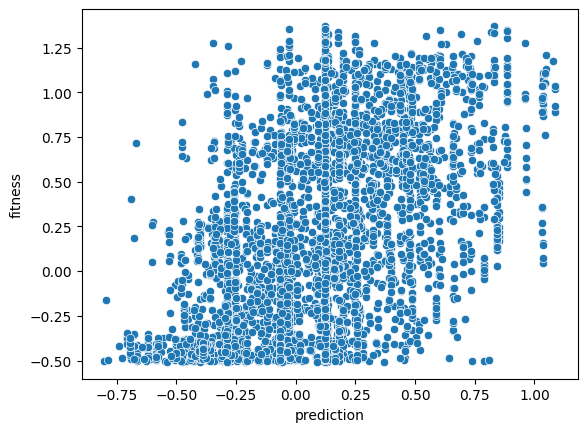

In [43]:
sns.scatterplot(wf, x="prediction", y="fitness")